# K-Means Clustering

1. Choose the number K of clusters
2. Select at random K points, the centroids (not necessarily from the dataset)
3. Assign each data point to the closest centroid --> That forms K clusters
4. Compute and place the new centroid of each cluster
5. Reassign each data point to the new closes centroid. If any reassignment took place, go to STEP 4, otherwise the model is ready.

OBS: Random Initialization Trap --> KMeans++

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

Using the elbow method to find the optimal number of clusters

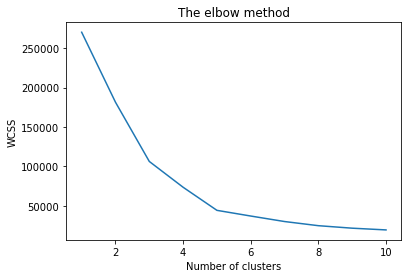

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of clusters is 5

Applying k-means on the mall dataset

In [7]:
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

Visualising the clusters

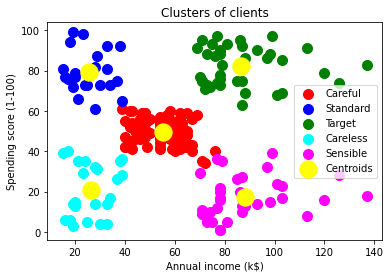

In [10]:
plt.scatter(X[y_kmeans == 0, 0],X[y_kmeans == 0,1], s=100, c='red',label='Careful')
plt.scatter(X[y_kmeans == 1, 0],X[y_kmeans == 1,1], s=100, c='blue',label='Standard')
plt.scatter(X[y_kmeans == 2, 0],X[y_kmeans == 2,1], s=100, c='green',label='Target')
plt.scatter(X[y_kmeans == 3, 0],X[y_kmeans == 3,1], s=100, c='cyan',label='Careless')
plt.scatter(X[y_kmeans == 4, 0],X[y_kmeans == 4,1], s=100, c='magenta',label='Sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()